# **Лабораторная работа №1**

# **Статистическое моделирование случайных величин. Точечное оценивание параметров распределения и функций распределения случайных величин.**

## **Вариант 8**

In [144]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sb

from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import logistic
from statsmodels.stats.descriptivestats import Description

## Часть 1 
## 1. Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,sigma^2)

In [145]:
n = 70
mu, du = 0, 4

In [146]:
s = np.random.normal(mu, math.sqrt(du), n)
a_estimate = np.mean(s)
sigma_estimate = np.std(s, ddof=1)
(a_estimate, sigma_estimate)

print(s)
print("\n")
print(f"estimate = ", a_estimate)

[-2.21852593 -0.93236396  2.76686785 -0.2835086  -1.65379647  0.94124053
  2.94031514 -2.07428506 -1.50186163 -0.62301264 -3.51206041  0.76973907
 -0.12972391 -0.88256345  0.26903606  0.15926212 -0.22120751 -0.92387138
  0.79511673 -0.15804914 -0.52627286  3.19076142  4.32183206  0.51192369
 -0.98218931  1.69842633 -1.48758929  2.92115892 -1.28244335  2.61654203
  0.17022935 -2.87407728  1.66073892 -0.81349362 -0.66299706 -4.90811598
 -1.3178707   0.30131349  1.06858386 -2.10924624  2.06850664 -0.4278945
  0.17756742 -0.74898706 -4.94603781 -0.41748035 -0.37831185  2.59404023
  2.4977063   0.22267229 -1.74758223 -1.88625233  0.62814628 -0.30331255
  1.98361528  2.62786208 -2.39108359  0.73728293 -0.07261323  1.07688311
 -0.67807971 -1.62226549  0.32069327 -1.66509812  3.03814598  0.95179652
 -3.31908514  1.11443874  0.74545067  2.32820541]


estimate =  -0.03524441525684228


## 1.1 Правило Дэвида Скотта

In [147]:
h = math.ceil((math.sqrt(du) * 3.5) / (np.cbrt(n)))
print(f"h = ", h)

min_data = np.min(s)
max_data = np.max(s)
bins = np.arange(min_data, max_data + h, h) 
print(bins)

h =  2
[-4.94603781 -2.94603781 -0.94603781  1.05396219  3.05396219  5.05396219]


## (2.2) Вычисление суммы абсолютных частот. Построение гистограммы абсолютных частот. Построение графика теоритической частоты распределения СВ Х

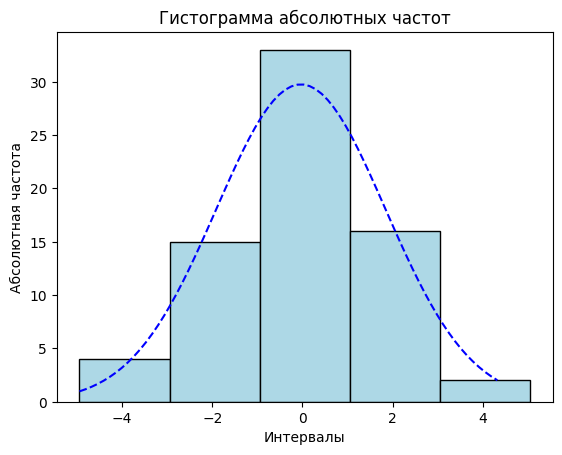

[ 4 15 33 16  2]
[-4.94603781 -2.94603781 -0.94603781  1.05396219  3.05396219  5.05396219]
Сумма абсолютных частот: 70


In [148]:
counts, bin_edges = np.histogram(s, bins)

total_frequency = np.sum(counts) 
plt.hist(s, bins=bins, edgecolor='black', color="lightblue")
x = np.linspace(min_data, max_data, 70)
mean = np.mean(s) 
std = np.std(s)  
pdf = norm.pdf(x, mean, std)
theoretical_frequency = pdf * (n * (bins[1] - bins[0]))
cdf = norm.cdf(x, mu, math.sqrt(du))
plt.plot(x, theoretical_frequency, "--", color="blue")
plt.xlabel('Интервалы')
plt.ylabel('Абсолютная частота')
plt.title('Гистограмма абсолютных частот') 
plt.show()

print(counts)
print(bin_edges)
print(f"Сумма абсолютных частот: {total_frequency}")

## 1.2(2.1) Вычисление суммы относительных частот. Построение гистограммы относительных частот. Построение графика теоритической кривой распределения СВ Х

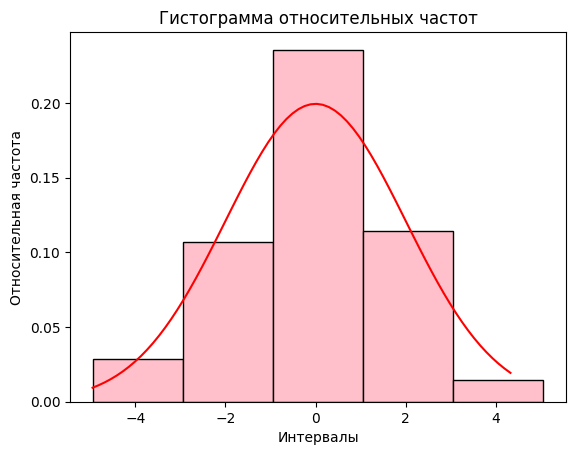

1.0


In [169]:
plt.hist(s, bins=bins, edgecolor='black', color="pink", density=True)
x = np.linspace(min_data, max_data, 70)
pdf = norm.pdf(x, mu, math.sqrt(du))
plt.plot(x, pdf, color="red")
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот') 
plt.show()
 
relative_frequencies = counts / n 
total_relative_frequency = np.sum(relative_frequencies)
print(total_relative_frequency)


## 2.3 Построение кумуляты относительных частот и графика теоритической функции распределения 

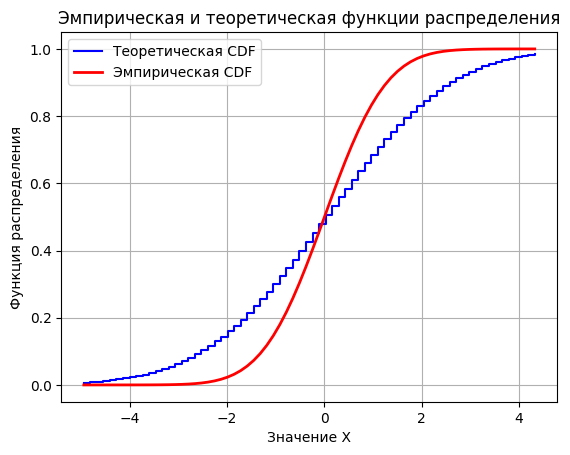

In [185]:
y = norm.cdf(x) 
# plt.plot(x, y, color="purple") 
plt.step(x, cdf, where='post', label='Теоретическая CDF', color='blue')
plt.plot(x, y, label='Эмпирическая CDF', color='red', linewidth=2)
plt.xlabel('Значение X')
plt.ylabel('Функция распределения')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.grid(True)

plt.show()

## 2.4 Построение по выборке бокс-плота распределения 

Axes(0.125,0.11;0.775x0.77)


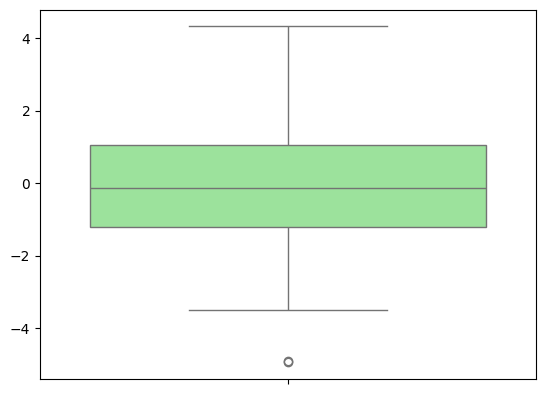

In [151]:
W=sb.boxplot(s, color="lightgreen") 
print(W)

## 3.1 Нахождение вероятности P(|X - M(X)| < q * sigma(X))

In [152]:
lower_b = mu - 0.5 * math.sqrt(du)
upper_b = mu + 0.5 * math.sqrt(du)

probability = norm.cdf(upper_b, loc=mu, scale=math.sqrt(du)) - norm.cdf(lower_b, loc=mu, scale=math.sqrt(du))

# print(format(probability, ".3f"))
print(f'Вероятность P(|X - M(X)| < q * sigma(X)) = {probability}')

Вероятность P(|X - M(X)| < q * sigma(X)) = 0.38292492254802624


## 3.2 Нахождение относительной частоты события {|X - M(X)| < q * sigma(X)}

In [153]:
count_event = np.sum((s < upper_b) & (s > lower_b))
print(count_event)

r_frequency = count_event / n
print(f'Относительная частота события |X - M(X)| < q * sigma(X): {r_frequency}')

34
Относительная частота события |X - M(X)| < q * sigma(X): 0.4857142857142857


## 3.3 Увеличили объем выборки в 50 раз, повторили п. 3.2

In [154]:
N = 3500
S = np.random.normal(mu, math.sqrt(du), N)
C = np.sum((S < upper_b) & (S > lower_b))
print(C)

R = C / N
print(R)

1341
0.3831428571428571


## 4.2 Вычисление по выборке точечных оценок параметров распределения СВ Х

In [155]:
mean_f = np.sum(s) / 70
var_f = np.sum((s - mean_f) ** 2) / 70
var = np.var(s)
std_f = math.sqrt(var_f)
m = np.median(s)
p = np.sort(s)
med_f = (0.59558845 + 0.60377051) / 2
as_f = np.sum((s - mean_f) ** 3) / (n * std_f**3)
a1 = skew(s, axis=0, bias=True)
ex_f = np.sum((s - mean_f) **4) / (n * std_f**4) - 3
ex = kurtosis(s)

print(p)
print(med_f)
print(m)
print(mean_f)
print(mean)
print(var_f)
print(var)
print(std_f)
print(sigma_estimate)
print(as_f)
print(a1)
print(ex_f)
print(ex)



[-4.94603781 -4.90811598 -3.51206041 -3.31908514 -2.87407728 -2.39108359
 -2.21852593 -2.10924624 -2.07428506 -1.88625233 -1.74758223 -1.66509812
 -1.65379647 -1.62226549 -1.50186163 -1.48758929 -1.3178707  -1.28244335
 -0.98218931 -0.93236396 -0.92387138 -0.88256345 -0.81349362 -0.74898706
 -0.67807971 -0.66299706 -0.62301264 -0.52627286 -0.4278945  -0.41748035
 -0.37831185 -0.30331255 -0.2835086  -0.22120751 -0.15804914 -0.12972391
 -0.07261323  0.15926212  0.17022935  0.17756742  0.22267229  0.26903606
  0.30131349  0.32069327  0.51192369  0.62814628  0.73728293  0.74545067
  0.76973907  0.79511673  0.94124053  0.95179652  1.06858386  1.07688311
  1.11443874  1.66073892  1.69842633  1.98361528  2.06850664  2.32820541
  2.4977063   2.59404023  2.61654203  2.62786208  2.76686785  2.92115892
  2.94031514  3.03814598  3.19076142  4.32183206]
0.59967948
-0.14388652736231322
-0.03524441525684228
-0.03524441525684228
3.524701735042315
3.524701735042315
1.8774189023876144
1.8909744495586152

## 4.3 Увеличили объем выборки в 50 раз, повторили п. 4.2

In [156]:
Mean_f = np.sum(S) / N
Mean = np.mean(S)
Var_f = np.sum((S - Mean_f) ** 2) / N
Var = np.var(S)
Std_f = math.sqrt(Var_f)
M = np.median(S)
P = np.sort(S)
p1 = S[1750:1751:1]
p2 = S[1751:1752:1] 
Med_f = (p1 + p2) / 2
As_f = np.sum((S - Mean_f) ** 3) / (N * Std_f**3)
A = skew(S, axis=0, bias=True)
Ex_f = np.sum((S - Mean_f) **4) / (N * Std_f**4) - 3
Ex = kurtosis(S)
 
print(Med_f)
print(M)
print(Mean_f)
print(Mean)
print(Var_f)
print(Var)
print(Std_f)
print(sigma_estimate)
print(As_f)
print(A)
print(Ex_f)
print(Ex)

[1.89434607]
0.07662376612580535
0.03782514673940128
0.03782514673940128
4.025248495894542
4.025248495894542
2.0063021945595687
1.8909744495586152
-0.0021614904325429917
-0.0021614904325429956
-0.003366588082665878
-0.003366588082665878


## Часть 2
## 1. Смоделировать выборку из п независимых наблюдений над случайной величиной Y, имеющей логистический закон распределения

In [157]:
a = 0
b = 1
s1 = np.random.logistic(a, b, n)
print(s1)

h1 = math.ceil((b * 3.5) / (np.cbrt(n)))
print(f"h = ", h1)

min_data1 = np.min(s1)
max_data1 = np.max(s1)
bins1 = np.arange(min_data1, max_data1 + h1, h1) 
print(bins1)

[-0.3868124  -2.22872389 -0.43434612 -0.90082054  1.46296311 -0.72060445
  0.54339211 -1.55394035 -0.95773364 -2.12824429 -1.09301273 -0.4134571
 -1.21776415  0.53179604  2.72880666 -1.27662092 -0.18961635 -2.79602749
  1.18808612 -1.57862759 -1.44536385 -0.20764477 -2.02971654  0.82209515
  0.40403607 -0.86808914 -2.77372164 -2.2826282   0.29312522 -3.08134883
 -6.36709791  1.67448771 -1.99620646  1.27825166  2.36933754  0.77445555
  0.25014628 -1.63389883 -0.72599416  0.71573881 -0.23556747 -0.91777264
  0.63551385  0.30114042  0.58835665 -1.57188349  0.94997835 -3.32644323
 -1.01256148  2.09839574  1.08094264 -2.48865953 -1.47587837 -2.73571909
 -2.00684864 -1.70232546  1.95321335 -0.34293009  1.97043    -3.9408609
  4.47361452  1.11046011  0.56151822 -0.72749608  1.15041476 -2.09024095
 -2.21531706 -2.38723157 -4.48228012  0.01079223]
h =  1
[-6.36709791 -5.36709791 -4.36709791 -3.36709791 -2.36709791 -1.36709791
 -0.36709791  0.63290209  1.63290209  2.63290209  3.63290209  4.63290

## 2. Построение гистограммы относительных частот и теоретической кривой распределения СВ Y

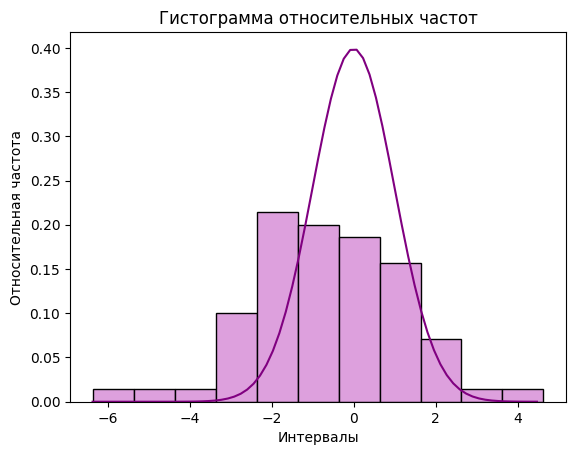

0.9999999999999999


In [158]:
counts1, bin_ed = np.histogram(s1, bins1)
y = np.linspace(min_data1, max_data1, n)
plt.hist(s1, bins=bins1, edgecolor="black", color="plum", density=True)
pdf = norm.pdf(y, a, b)
plt.plot(y, pdf, color="purple")
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')
plt.show()

rf = counts1 / n
trf = np.sum(rf)
print(trf)

## 3. Построение по выборке бокс-плота распределения СВ Y

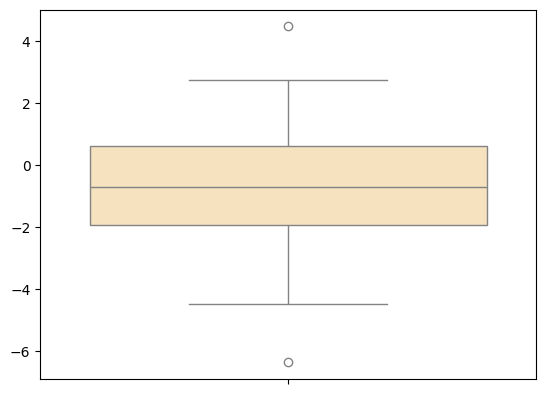

In [188]:
w = sb.boxplot(s1, color="moccasin")

## 4.1 Нахождение вероятности P(|Y - M(Y)| < q * s(Y))

In [160]:
lower = a - 0.5 * b
upper = a + 0.5 * b
probab = logistic.cdf(upper, loc=a, scale=b) - logistic.cdf(lower, loc=a, scale=b)

print(f'Вероятность P(|Y - M(Y)| < q * s(Y)) = {probab}')

Вероятность P(|Y - M(Y)| < q * s(Y)) = 0.2449186624037092


## 4.2 Нахождение относительной частоты события {|Y - M(Y)| < q * s(Y)}

In [161]:
count_event2 = np.sum((s1 < upper) & (s1 > lower))
print(count_event2)

r_f = count_event2 / n
print(r_f)

12
0.17142857142857143


## 4.3 Увеличили объем выборки в 50 раз, повторили п. 4.2

In [162]:
s2 = np.random.logistic(a, b, N)
c2 = np.sum((s2 < upper) & (s2 > lower))
print(c2)

rf_ = c2 / N
print(rf_)

863
0.24657142857142858


## 5. Вычисление по выборке точечных оценок параметров распределения СВ Y

In [163]:
result = Description(
    s1,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=0.05,
    use_t=True)
display(result.summary())

nobs,70.0
missing,0.0
mean,-0.6146655664092633
std_err,0.21874366291614172
upper_ci,-0.17828389909472053
lower_ci,-1.0510472337238062
std,1.8301407881958
iqr,2.5464607543742197
mad,1.4459926804314798
coef_var,-2.977457805041963
range,10.84071243378932


## Увеличили объем выборки в 50 раз, повторили п. 5 

In [164]:
result1 = Description(
    s2,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=0.05,
    use_t=True)
display(result1.summary())

nobs,3500.0
missing,0.0
mean,-0.024682296821133223
std_err,0.030935817229883592
upper_ci,0.03597177195074459
lower_ci,-0.08533636559301103
std,1.8301876288737908
iqr,2.2017393895378934
mad,1.3969249310039398
coef_var,-74.14981037367504
range,18.60972063427463
